# Import CSV

In [1]:
import pandas as pd
df = pd.read_csv('DSC 288 Processed Reddit Dataset.csv')
print(df)

                                                  Title  \
0     Your anger may be caused by a magnesium defici...   
1     Do you ever get so angry that you wish to kill...   
2     Does anyone else just avoid people because you...   
3     Was anyone else “not allowed” to get upset gro...   
4     I wish people understood that outbursts don't ...   
...                                                 ...   
9050                                Anxiety and bruxism   
9051                                      im giving up    
9052                                   holding breath?    
9053                                       I’m curious!   
9054                           How to break the cycle?    

                                                   Text  Score  Topic  \
0     I tried absolutely everything to fix my chroni...    741  anger   
1     I don't know if it's my anger issues talking o...    680  anger   
2     Lately I’ve been noticing that I take the extr...    478  anger   

# Exploratory Data Analysis

In [2]:
# Word Count
df['Title_words'] = df['Title_pro'].apply(lambda x: len(x.split()))
df['Text_words'] = df['Text_pro'].apply(lambda x: len(x.split()))

# Character Count
df['Title_char'] = df['Title_pro'].apply(len)
df['Text_char'] = df['Text_pro'].apply(len)

# Average Word Length
df['Title_avg'] = df['Title_pro'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['Text_avg'] = df['Text_pro'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

print(df[['Title_words', 'Title_char', 'Title_avg']].describe())
print(df[['Text_words', 'Text_char', 'Text_avg']].describe())

       Title_words   Title_char    Title_avg
count  9055.000000  9055.000000  9055.000000
mean      5.881391    37.839647     5.679304
std       3.862455    25.516440     1.413028
min       1.000000     2.000000     1.000000
25%       3.000000    20.000000     4.888889
50%       5.000000    32.000000     5.500000
75%       7.000000    49.000000     6.333333
max      34.000000   228.000000    43.000000
        Text_words     Text_char     Text_avg
count  9055.000000   9055.000000  9055.000000
mean     85.525235    560.950083     5.541092
std     116.218108    791.266827     2.105222
min       1.000000      2.000000     1.000000
25%      29.000000    182.000000     5.149029
50%      57.000000    367.000000     5.444444
75%     102.000000    662.500000     5.750000
max    2721.000000  19078.000000   136.000000


In [4]:
df['T_T_pro'] = df['Title_pro'] +" "+ df['Text_pro']

df['T_T_words'] = df['T_T_pro'].apply(lambda x: len(x.split()))
df['T_T_char'] = df['T_T_pro'].apply(len)
df['T_T_avg'] = df['T_T_pro'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
print(df[['T_T_words', 'T_T_char', 'T_T_avg']].describe())

         T_T_words      T_T_char      T_T_avg
count  9055.000000   9055.000000  9055.000000
mean     91.406626    599.789729     5.522909
std     116.230739    791.788428     1.035800
min       2.000000     14.000000     3.000000
25%      34.000000    221.000000     5.185807
50%      63.000000    405.000000     5.463768
75%     108.000000    703.000000     5.757991
max    2725.000000  19107.000000    75.952381


In [7]:
#Top 20 Most Common Words
from collections import Counter

all_words = " ".join(df['T_T_pro']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('im', 14875), ('like', 10728), ('feel', 9197), ('dont', 7398), ('get', 7124), ('time', 6303), ('know', 6110), ('ive', 5355), ('people', 5286), ('panic', 5100), ('day', 5062), ('want', 4862), ('thing', 4669), ('even', 4534), ('one', 4458), ('life', 4362), ('attack', 4355), ('year', 4351), ('really', 4211), ('make', 3747)]


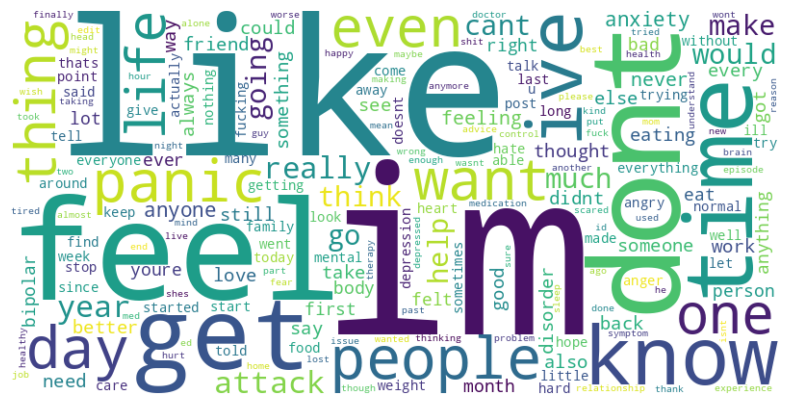

In [8]:
#Word Cloud Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()